In [3]:
%matplotlib inline
!pip install wordcloud

    100% |████████████████████████████████| 174kB 2.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /home/rasmuserik/.cache/pip/wheels/d9/4c/ac/e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


In [24]:
import requests
url = "https://www.gutenberg.org/files/2981/2981-0.txt" # casanova
url = "https://www.gutenberg.org/files/1524/1524-0.txt" # hamlet
text = requests.get(url).text


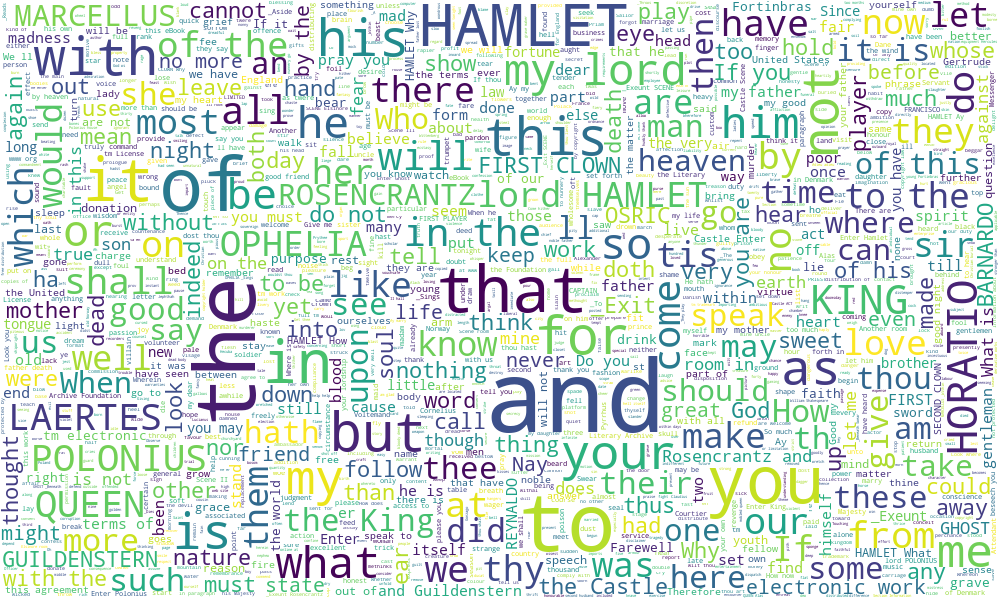

In [42]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=1000,
    height=600,
    max_words=4000,
    stopwords=["Project", "Gutenberg"],
    background_color= 'white', 
    max_font_size=100
).generate(text)
# .generate_from_frequencies(frequencies)
wordcloud.to_image()

In [68]:
import json
import requests
title = "The Beatles"
result = json.loads(requests.get(
    'https://en.wikipedia.org/w/api.php', 
    params = {
        "action": "query",
        "titles": title,
        "prop": "links",
        "format": "json",
        "plnamespace": [0],
        "pllimit": 500
    }).text)
links = [link["title"] for link in list(result["query"]["pages"].values())[0]["links"]]

titles = []
for i in range(len(links)):
    print(i, len(links), title)
    title = links[i]
    result = json.loads(requests.get(
        'https://en.wikipedia.org/w/api.php', 
        params = {
            "action": "query",
            "titles": title,
            "prop": "links",
            "format": "json",
            "plnamespace": [0],
            "pllimit": 500
        }).text)
    titles = titles + [link["title"] for link in list(result["query"]["pages"].values())[0]["links"]]
    
    

0 500 The Beatles
1 500 (It's All Down to) Goodnight Vienna
2 500 1962–1966
3 500 1967–1970
4 500 1989 (Taylor Swift album)
5 500 1 (Beatles album)
6 500 1 (The Beatles album)
7 500 2004 Summer Tour
8 500 20 Greatest Hits (Beatles album)
9 500 21 (Adele album)
10 500 24K Magic (album)
11 500 251 Menlove Avenue
12 500 25 (Adele album)
13 500 34 Montagu Square, Marylebone
14 500 4-Starr Collection
15 500 4 by the Beatles
16 500 52nd Street (album)
17 500 56th Annual Grammy Awards
18 500 A. C. Bhaktivedanta Swami Prabhupada
19 500 A Cellarful of Noise
20 500 A Collection of Beatles Oldies
21 500 A Day in the Life
22 500 A Dose of Rock 'n' Roll
23 500 A Garland for Linda
24 500 A Hard Day's Night (album)
25 500 A Hard Day's Night (film)
26 500 A Hard Day's Night (song)
27 500 A Man and His Music
28 500 A Salute to the Beatles: Once upon a Time
29 500 A Spaniard in the Works
30 500 A Toot and a Snore in '74
31 500 Abbey Road
32 500 Abbey Road, London
33 500 Abbey Road Studios
34 500 Abe Lab

311 500 Electric Arguments
312 500 Electronic Entertainment Expo
313 500 Electronic Sound
314 500 Elizabeth II
315 500 Elton John
316 500 Elvis Costello
317 500 Elvis Presley
318 500 Empty Garden (Hey Hey Johnny)
319 500 Encouraging Words
320 500 Encyclopædia Britannica
321 500 Environmental movement
322 500 Erection (film)
323 500 Eric Clapton
324 500 Eric Griffiths
325 500 European Union
326 500 Everyday Chemistry
327 500 Ewart Abner
328 500 Exi (subculture)
329 500 Extended Versions (Ringo Starr album)
330 500 Extended play
331 500 Extra Texture (Read All About It)
332 500 Extracts from the Album A Hard Day's Night
333 500 Extracts from the Film A Hard Day's Night
334 500 Fab Four
335 500 Fab Four (disambiguation)
336 500 Faith (George Michael album)
337 500 Falling into You
338 500 Fearless (Taylor Swift album)
339 500 Feminist movement
340 500 Fifth Beatle
341 500 Filler (media)
342 500 First Live Recordings
343 500 Flaming Pie
344 500 Fleetwood Mac
345 500 Florence Ballard
346 50

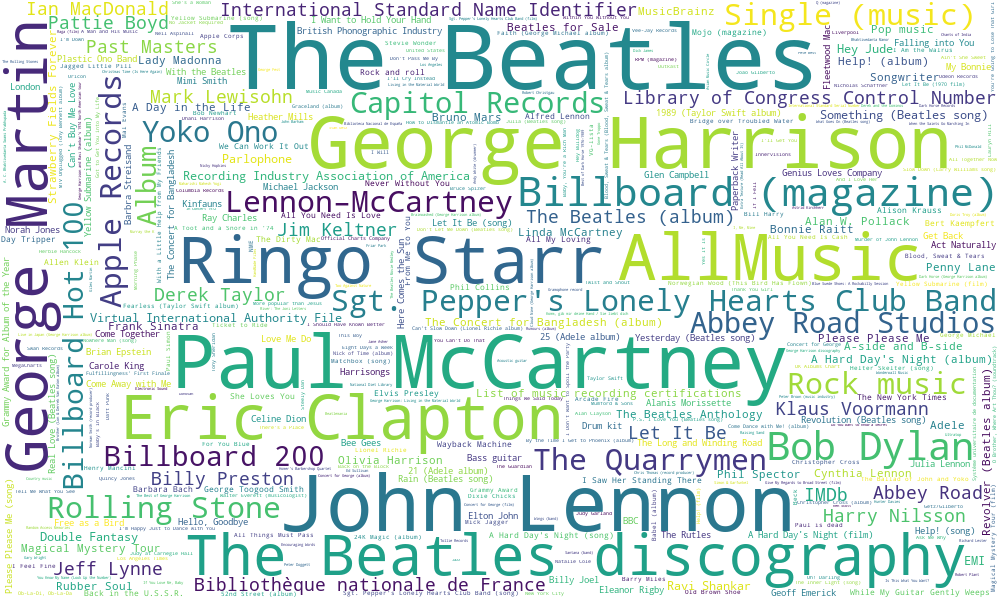

In [77]:
from collections import Counter
frequencies = dict(Counter(titles).most_common())
frequencies.pop('International Standard Book Number', None)
frequencies.pop('Record label', None)
frequencies.pop('Music genre', None)
frequencies.pop('Integrated Authority File', None)
frequencies.pop('Record producer', None)
wordcloud = WordCloud(
    width=1000,
    height=600,
    max_words=4000,
    background_color= 'white'
    , max_font_size=90
).generate_from_frequencies(frequencies)
wordcloud.to_image()

In [62]:
print(frequencies)

{'International Standard Book Number': 146, 'Dance': 115, 'Ballet': 102, 'Dance in India': 84, 'Modern dance': 82, 'Dance in Indonesia': 80, 'Ballet technique': 79, 'Dance in Cambodia': 79, 'Dance in China': 79, 'Dance in Thailand': 79, 'Folk dance': 79, 'Assyrian folk dance': 76, 'Ballroom dance': 76, 'Circle dance': 76, 'Pointe technique': 76, 'Concert dance': 74, 'African dance': 74, 'Contemporary dance': 74, 'History of dance': 74, 'Kurdish dance': 74, 'Line dance': 74, 'List of dances': 74, 'Acro dance': 74, 'Belly dance': 73, 'Dance in the United States': 73, 'Dance move': 73, 'Hip-hop dance': 73, 'Jazz dance': 73, 'List of dance style categories': 73, 'List of ethnic, regional, and folk dances by origin': 73, 'Breakdancing': 72, 'Competitive dance': 72, 'Dance costume': 72, 'Dance in film': 72, 'Dance notation': 72, 'Dance on television': 72, 'Glossary of dance moves': 72, 'Outline of dance': 72, 'Partner dance': 72, 'Arab dance': 71, 'Choreography (dance)': 71, 'Connection (dan